# Predict gene knockout strategies

In cameo we have two ways of predicting gene knockout targets: using evolutionary algorithms (OptGene) or linear programming (OptKnock)

In [1]:
from cameo import models

In [2]:
model = models.bigg.iJO1366
model.solver = "cplex"

In [3]:
wt_solution = model.solve()
growth = wt_solution.fluxes["BIOMASS_Ec_iJO1366_core_53p95M"]
acetate_production = wt_solution.fluxes["EX_ac_e"]

In [4]:
from cameo import phenotypic_phase_plane

In [5]:
p = phenotypic_phase_plane(model, variables=['BIOMASS_Ec_iJO1366_core_53p95M'], objective='EX_ac_e')
p.plot(points=[(growth, acetate_production)])

## OptGene

OptGene is an approach to search for gene or reaction knockouts that relies on evolutionary algorithms[1]. The following image from authors summarizes the OptGene workflow.

<img src="http://static-content.springer.com/image/art%3A10.1186%2F1471-2105-6-308/MediaObjects/12859_2005_Article_632_Fig1_HTML.jpg"/>

Every iteration we keep the best 50 individuals so we can generate a library of targets.

In [6]:
from cameo.strain_design.heuristic.evolutionary_based import OptGene

In [7]:
optgene = OptGene(model)

In [8]:
result = optgene.run(target="EX_ac_e", 
                     biomass="BIOMASS_Ec_iJO1366_core_53p95M",
                     substrate="glc__D_e",
                     max_evaluations=5000,
                     plot=False)

Starting optimization at Tue, 24 May 2016 11:37:13


Finished after 00:07:57


In [9]:
result

,reactions,genes,size,fva_min,fva_max,target_flux,biomass_flux,yield,fitness
0,"(ATPS4rpp, THFAT, GHMT2r, SUCDi)","((b3736, b2523, b2551, b2813, b0724),)",5.0,14.183950,14.644673,14.497425,0.393362,1.449742,0.570274
1,"(PGL, G3PAT120, G3PAT140, G3PAT160, G3PAT161, ...","((b4041, b3737, b2551, b0767, b0724),)",5.0,14.183952,14.644674,14.497426,0.393362,1.449743,0.570274
2,"(ACMANAptspp, FRUpts2pp, MANptspp, THFAT, GHMT...","((b3962, b2551, b2154, b3737, b1818, b4071),)",6.0,0.000000,14.644674,-0.000000,0.393362,-0.000000,-0.000000
3,"(THFAT, GHMT2r, ATPS4rpp, HEX1, SUCDi)","((b2523, b2551, b3736, b2388, b2701, b0724),)",6.0,14.183952,14.644674,14.497426,0.393362,1.449743,0.570274
4,"(PGL, DC6PH, THFAT, GHMT2r, ATPS4rpp, SUCDi)","((b1734, b2551, b0767, b3737, b0724, b2251),)",6.0,14.183952,14.644674,14.497426,0.393362,1.449743,0.570274
5,"(POX, THFAT, GHMT2r, ATPS4rpp, UDPKAAT, SUCDi,...","((b2551, b3737, b2253, b0871, b0724, b4071),)",6.0,14.183950,14.644673,14.497425,0.393362,1.449742,0.570274
6,"(O16AP3pp, GTHPi, THFAT, GHMT2r, O16AP1pp, ATP...","((b3962, b2551, b2027, b3737, b1710, b0724), (...",6.0,14.183952,14.644674,14.497426,0.393362,1.449743,0.570274
...,...,...,...,...,...,...,...,...,...
39,"(GUAD, SELtpp, SLNTtpp, TSULabcpp, THFAT, GHMT...","((b3892, b2423, b2551, b3736, b2662, b2907, b0...",8.0,14.183952,14.644674,14.497426,0.393362,1.449743,0.570274
40,"(THFAT, GHMT2r, ATPS4rpp, OMPHHX, SUCDi)","((b4301, b2551, b3736, b2662, b1224, b2907, b1...",9.0,14.183952,14.644674,14.497426,0.393362,1.449743,0.570274


In [10]:
result.plot(0)

In [11]:
result.display_on_map(0, "iJO1366.Central metabolism")

## OptKnock

OptKnock uses a bi-level mixed integer linear programming approach to identify reaction knockouts[2]:

$$
\begin{matrix}
maximize & \mathit{v_{chemical}} & & (\mathbf{OptKnock}) \\
\mathit{y_j} & & & \\
subject~to & maximize & \mathit{v_{biomass}} & (\mathbf{Primal}) \\
& \mathit{v_j} & & & & \\
\end{matrix}\\
\begin{bmatrix}
subject~to  & \sum_{j=1}^{M}S_{ij}v_{j} = 0,\\ 
& v_{carbon\_uptake} = v_{carbon~target}\\ 
& v_{apt} \ge v_{apt\_main}\\ 
& v_{biomass} \ge v_{target\_biomass}\\ 
& v_{j}^{min} \cdot y_j \le v_j \le v_{j}^{max} \cdot y_j, \forall j \in \boldsymbol{M} \\
\end{bmatrix}\\
\begin{align}
 & y_j = {0, 1}, & & \forall j \in \boldsymbol{M} & \\
 & \sum_{j \in M} (1 - y_j) \le K& & & \\
\end{align}
$$



In [12]:
from cameo.strain_design.deterministic.linear_programming import OptKnock

In [13]:
optknock = OptKnock(model, fraction_of_optimum=0.1)

Running multiple knockouts with OptKnock can take a few hours or days...


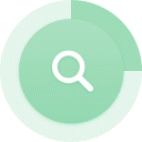

<IPython.core.display.Javascript object>

In [14]:
result = optknock.run(max_knockouts=1, target="EX_ac_e", biomass="BIOMASS_Ec_iJO1366_core_53p95M")

In [15]:
result

,reactions,size,EX_ac_e,biomass,fva_min,fva_max
0,{ATPS4rpp},1.0,13.94293,0.402477,0.0,14.187819


In [16]:
result.plot(0)

In [17]:
result.display_on_map(0, "iJO1366.Central metabolism")

## References

[1]Patil, K. R., Rocha, I., Förster, J., & Nielsen, J. (2005). Evolutionary programming as a platform for in silico metabolic engineering. BMC Bioinformatics, 6, 308. doi:10.1186/1471-2105-6-308

[2]Burgard, A.P., Pharkya, P., Maranas, C.D. (2003), "OptKnock: A Bilevel Programming Framework for Identifying Gene Knockout Strategies for Microbial Strain Optimization," Biotechnology and Bioengineering, 84(6), 647-657.